In [95]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [97]:
data = {
    'Toy': ['Teddy Bear', 'Action Figure', 'Lego Set', 'Doll', 'Puzzle', 'Toy Car','Board Game', 'Stuffed Animal'],
    'Type': ['Plush', 'Action', 'Building', 'Plush', 'Puzzle', 'Vehicle', 'Board','Plush'],
    'Size': ['Medium', 'Small', 'Large', 'Medium', 'Small', 'Small', 'Medium','Large'],
    'Color': ['Brown', 'Red', 'Mixed', 'Pink', 'Multicolor', 'Blue', 'Green', 'Gray'],
    'Price': [25, 15, 45, 20, 10, 12, 30, 35]
}

In [99]:
df = pd.DataFrame(data)
print(df)
print()
print(df.info())
print()
print(df.describe())

              Toy      Type    Size       Color  Price
0      Teddy Bear     Plush  Medium       Brown     25
1   Action Figure    Action   Small         Red     15
2        Lego Set  Building   Large       Mixed     45
3            Doll     Plush  Medium        Pink     20
4          Puzzle    Puzzle   Small  Multicolor     10
5         Toy Car   Vehicle   Small        Blue     12
6      Board Game     Board  Medium       Green     30
7  Stuffed Animal     Plush   Large        Gray     35

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Toy     8 non-null      object
 1   Type    8 non-null      object
 2   Size    8 non-null      object
 3   Color   8 non-null      object
 4   Price   8 non-null      int64 
dtypes: int64(1), object(4)
memory usage: 452.0+ bytes
None

           Price
count   8.000000
mean   24.000000
std    12.165525
min    10.000000
25%   

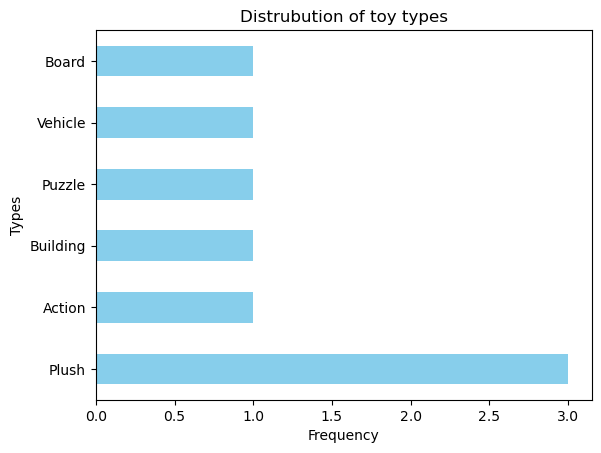

In [101]:
df['Type'].value_counts().plot.barh(color = 'skyblue')
plt.title("Distrubution of toy types")
plt.xlabel("Frequency")
plt.ylabel("Types")
plt.show()

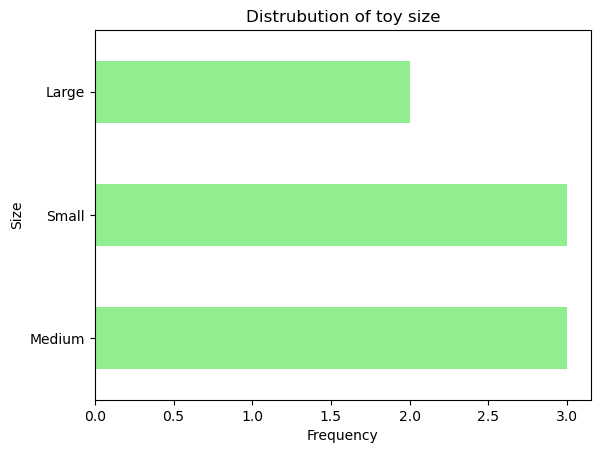

In [103]:
df['Size'].value_counts().plot.barh(color = 'lightgreen')
plt.title("Distrubution of toy size")
plt.xlabel("Frequency")
plt.ylabel("Size")
plt.show()

In [105]:
label = LabelEncoder()
df["Type"] = label.fit_transform(df["Type"])
df["Size"] = label.fit_transform(df["Size"])
df["Color"] = label.fit_transform(df["Color"])
print(df)

              Toy  Type  Size  Color  Price
0      Teddy Bear     3     1      1     25
1   Action Figure     0     2      7     15
2        Lego Set     2     0      4     45
3            Doll     3     1      6     20
4          Puzzle     4     2      5     10
5         Toy Car     5     2      0     12
6      Board Game     1     1      3     30
7  Stuffed Animal     3     0      2     35


In [107]:
X = df.drop(["Toy", "Price"], axis = 1)
y = df["Price"]

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [111]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [113]:
y_pred = model.predict(X_test)
mse_test = metrics.mean_squared_error(y_test, y_pred)
print(mse_test)

40.09853369224738


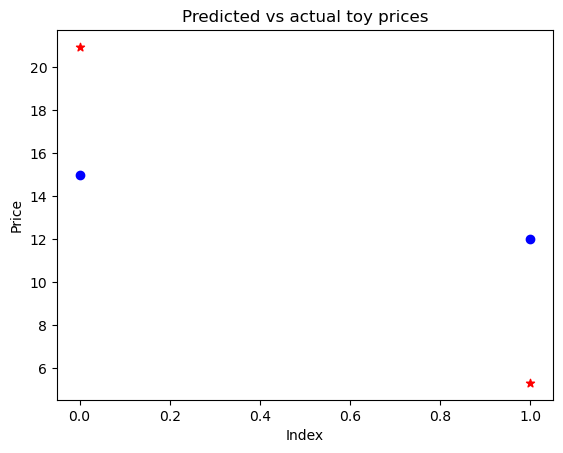

Linear Regression MSE (Test): 40.09853369224738


In [115]:
def plot(X1 = y_test, Y1 = y_pred, title = "Predicted vs actual toy prices"):
    plt.scatter(range(len(X1)), X1, c = "Blue", label = 'Actual')
    plt.scatter(range(len(Y1)), Y1, marker = "*", c = "Red", label = "predicted")
    plt.title(title)
    plt.xlabel("Index")
    plt.ylabel("Price")
    plt.show()
    plt.show()
plot()
print(f"Linear Regression MSE (Test): {mse_test}")

In [117]:
# Home task 1

In [119]:
import seaborn as sns

In [121]:
data = {
    'Size (sq ft)': [1500, 1600, 1700, 1800, 1900, 2100, 2200, 2300, 2400, 2500],
    'Rooms': [3, 3, 3, 4, 4, 4, 4, 5, 5, 5],
    'Location': [1, 2, 3, 1, 2, 3, 1, 2, 3, 1],
    'Price ($)': [300000, 320000, 340000, 360000, 380000, 400000, 420000, 440000, 460000, 480000]
}

In [123]:
df = pd.DataFrame(data)
print(df)
print()
print(df.info())
print()
print(df.describe())

   Size (sq ft)  Rooms  Location  Price ($)
0          1500      3         1     300000
1          1600      3         2     320000
2          1700      3         3     340000
3          1800      4         1     360000
4          1900      4         2     380000
5          2100      4         3     400000
6          2200      4         1     420000
7          2300      5         2     440000
8          2400      5         3     460000
9          2500      5         1     480000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Size (sq ft)  10 non-null     int64
 1   Rooms         10 non-null     int64
 2   Location      10 non-null     int64
 3   Price ($)     10 non-null     int64
dtypes: int64(4)
memory usage: 452.0 bytes
None

       Size (sq ft)      Rooms   Location      Price ($)
count     10.000000  10.000000  10.000000      10.000000
mean 

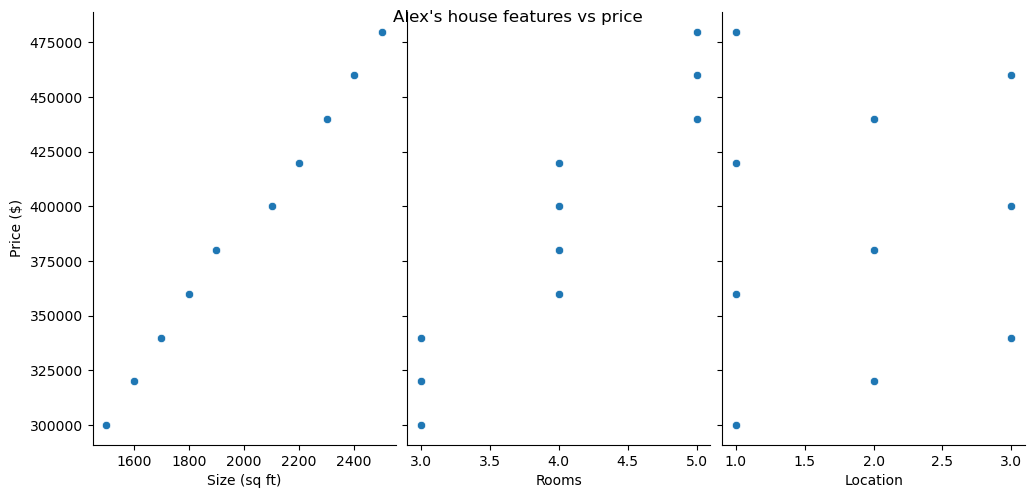

In [125]:
sns.pairplot(df, x_vars = ['Size (sq ft)', 'Rooms', 'Location'], y_vars = 'Price ($)', height = 5, aspect = 0.7, kind = 'scatter')
plt.suptitle("Alex's house features vs price")
plt.show()

In [127]:
X = df[['Size (sq ft)', 'Rooms', 'Location']]
y = df['Price ($)']

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [131]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [133]:
y_pred = model.predict(X_test)

In [135]:
mse = metrics.mean_squared_error(y_test, y_pred)
print(f"Mean squared error: ${mse:.2f}")

Mean squared error: $26234141.35


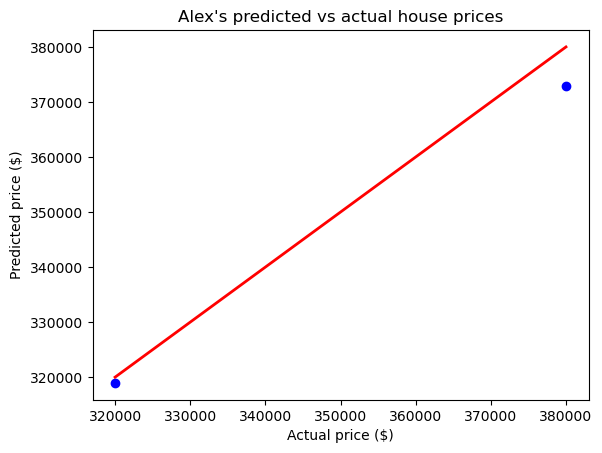

In [137]:
plt.scatter(y_test, y_pred, color = "Blue")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = "red", linewidth = 2)
plt.title("Alex's predicted vs actual house prices")
plt.xlabel("Actual price ($)")
plt.ylabel("Predicted price ($)")
plt.show()

In [139]:
dream_house = [[2400, 4, 2]]
dream_price = model.predict(dream_house)
print(f" Alex's dream house is predicted to cost: ${dream_price[0]:,.2f}")

 Alex's dream house is predicted to cost: $454,317.14


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
